# Dimentionality Reduction

#### Problem statment
A retail company wants - > customer purchase behaviour against various products of different categories.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("Dimentionality Reduction.csv")

#### To do Dimentionality Reduction, we should get familer with the dimensions/features in the dataset

In [5]:
print("No.of rows * Colmuns are ",df.shape,"\n","\n The column names and their dtypes of the dataset are \n\n",df.dtypes)

No.of rows * Colmuns are  (550068, 12) 
 
 The column names and their dtypes of the dataset are 

 User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


Let us see the first 10 rows of the data...in the dataset

In [6]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#### Missing Values 

In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

From the above Information we can observe only <span style='color:red'>Product_Category_2 (73638)</span> and 
<span style='color:red'> Product_Category_3 (383247)</span> has a large number of missing values.

Lets find the ratio between the missing values

In [9]:
print("Product_Category_2 Percentage of missing values is: ",end="")
print(round((df['Product_Category_2'].isnull().sum()/len(df['Product_Category_2'].index))*100,2),"%")
print("Product_Category_3 Percentage of missing values is: ",end="")
print(round((df['Product_Category_3'].isnull().sum()/len(df['Product_Category_3'].index))*100,2),"%")

Product_Category_2 Percentage of missing values is: 31.57 %
Product_Category_3 Percentage of missing values is: 69.67 %


When we have more number of values we our best choice is median

In [10]:
df["Product_Category_2"].fillna(df["Product_Category_2"].median(), inplace=True)
df["Product_Category_3"].fillna(df["Product_Category_3"].median(), inplace=True)

In [11]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

##### No missing values

##### Getting the Unique value count from the dataset with Missing values

In [12]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [13]:
for i in df.columns:
    if len(df[i].unique()) <= 10:
        print(i,"column we have ",len(df[i].unique()),"Unique values :","\n ",df[i].unique())
        print("\n")

Gender column we have  2 Unique values : 
  ['F' 'M']


Age column we have  7 Unique values : 
  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


City_Category column we have  3 Unique values : 
  ['A' 'C' 'B']


Stay_In_Current_City_Years column we have  5 Unique values : 
  ['2' '4+' '3' '1' '0']


Marital_Status column we have  2 Unique values : 
  [0 1]




By using <span style='color:green'> OneHotEncoder and LabelEncoding</span> we encode them.

In [14]:
#for Gender we can OneHot them and remove one column
df['GenderEC']=df['Gender'].map({'F':0,'M':1})
df['City_CategoryEC']=df['City_Category'].map({'A':0,'B':1,'C':2})
df['Stay_In_Current_City_YearsEC']= df['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'+4':4})

In [15]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,GenderEC,City_CategoryEC,Stay_In_Current_City_YearsEC
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370,0,0,2.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0,0,2.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,14.0,1422,0,0,2.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057,0,0,2.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,14.0,7969,1,2,NaN


In [16]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,GenderEC,City_CategoryEC,Stay_In_Current_City_YearsEC
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,465342.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.576434,13.596114,9263.968713,0.753105,1.042640,1.468494
std,1.727592e+03,6.522660,0.491770,3.936211,4.226025,2.352863,5023.065394,0.431205,0.760211,0.989087
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000,0.000000,0.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,14.000000,5823.000000,1.000000,0.000000,1.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000,1.000000,1.000000,1.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,14.000000,12054.000000,1.000000,2.000000,2.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,2.000000,3.000000


### 1.Check the correlation matrix and identify most correlated features.

In [17]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,GenderEC,City_CategoryEC,Stay_In_Current_City_YearsEC
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001644,0.001008,0.004716,-0.033474,0.022859,-0.026053
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.000557,0.004325,0.020833,0.117291,0.034479,0.031107
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.011526,0.012705,-0.000463,-0.011603,0.039790,-0.012341
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.331691,0.195930,-0.343703,-0.045594,-0.014364,-0.013732
Product_Category_2,0.001644,0.000557,0.011526,0.331691,1.000000,0.416680,-0.156676,-0.014051,-0.006888,-0.006108
Product_Category_3,0.001008,0.004325,0.012705,0.195930,0.416680,1.000000,-0.093656,0.005887,-0.011300,-0.003094
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.156676,-0.093656,1.000000,0.060346,0.061914,0.007276
GenderEC,-0.033474,0.117291,-0.011603,-0.045594,-0.014051,0.005887,0.060346,1.000000,-0.004515,-0.006984
City_CategoryEC,0.022859,0.034479,0.039790,-0.014364,-0.006888,-0.011300,0.061914,-0.004515,1.000000,0.017269
Stay_In_Current_City_YearsEC,-0.026053,0.031107,-0.012341,-0.013732,-0.006108,-0.003094,0.007276,-0.006984,0.017269,1.000000


As of the data is not yet Scaled/normalize/standerdize we need to scale data before performing these operations

In the above dataset there few features which or not so helpful/useful to find their corr() so make new df or drop the unwanted features and perform your actions

In [18]:
df1=df[['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]

In [19]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)
df2 = pd.DataFrame(df_scaled, columns=df1.columns)

<AxesSubplot:>

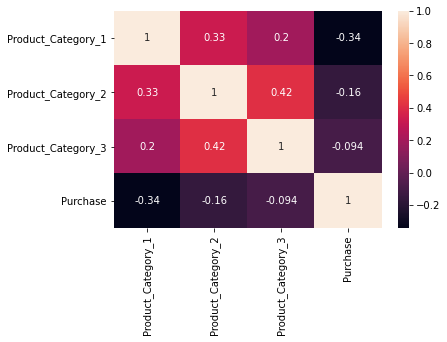

In [20]:
sns.heatmap(df2.corr(), annot=True)

Company wants to understand the customer purchase behaviour against various products of different categories.So, we have elininated other features

#### Note:
    1. Product_Category_2 is very much correlated with Product_Category_1 and Product_Category_3

### 2.Find out the Covariance Matrix? Also Identify eigen values and eigen vectors of covariance matrix.

In [24]:
df3= np.array(df2)
covarMat = np.cov(df3.T)#np.cov() can only deal with array data types

#### covariance Matrix

In [25]:
print(covarMat)

[[ 1.00000182  0.33169208  0.19593022 -0.34370397]
 [ 0.33169208  1.00000182  0.41668031 -0.15667656]
 [ 0.19593022  0.41668031  1.00000182 -0.09365666]
 [-0.34370397 -0.15667656 -0.09365666  1.00000182]]


In [26]:
eigenValues, eigenVectors = np.linalg.eig(covarMat)

#### Eigen Values

In [28]:
print(eigenValues)

[1.78432961 1.02249543 0.6504807  0.54270154]


#### Eigen Vectors

In [29]:
print(eigenVectors)

[[ 0.53584727  0.35224619  0.61870333 -0.4538684 ]
 [ 0.5632321  -0.34644296  0.23261586  0.71318773]
 [ 0.48141841 -0.55175043 -0.46667782 -0.49600362]
 [-0.40481307 -0.67191618  0.58762902 -0.19836117]]


### 3. Find out the two most important Principal Components.

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [30]:
for ev in eigenVectors.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In [31]:
# Make a list of (eigenvalue, eigenvector) tuples
eigPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigPairs.sort(key=lambda x: x[0], reverse=True)
for i in eigPairs:
    print(i[0])

1.7843296060019977
1.0224954254920544
0.6504806981102764
0.5427015422371018


The two most important principal components are:

    1st principal component: 1.784
    2nd principal component: 1.022

### 4. Select only 8 features using PCA.

In [37]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df2)
principalDf = pd.DataFrame(data = principalComponents , columns = ['f1', 'f2', 'f3', 'f4'])#,'f5', 'f6', 'f7', 'f8'])

In [38]:
principalDf.head(5)

,f1,f2,f3,f4
0,0.249441,-0.143029,-0.594329,-0.130107
1,1.471974,-0.989695,-0.274810,0.415281
2,-1.535701,1.591778,0.007494,0.633270
3,-2.231502,1.230710,0.240012,-0.224949
4,-0.463541,0.358055,0.144672,0.430587


##### In df2 we have only 4 Features so we can creat 8 PCA features for data we need to again create new df4

In [39]:
df.dtypes

User_ID                           int64
Product_ID                       object
Gender                           object
Age                              object
Occupation                        int64
City_Category                    object
Stay_In_Current_City_Years       object
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Purchase                          int64
GenderEC                          int64
City_CategoryEC                   int64
Stay_In_Current_City_YearsEC    float64
dtype: object

In [49]:
df4=df[['User_ID','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3','Purchase',
        'GenderEC','City_CategoryEC']]

In [50]:
df4.isnull().sum()

User_ID               0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
Purchase              0
GenderEC              0
City_CategoryEC       0
dtype: int64

To avoid this <span style='color:red'>Input contains NaN, infinity or a value too large for dtype('float64')</span>

we need change these types by using "astype"

In [51]:
int16 = df4[['User_ID','Marital_Status', 'Product_Category_1', 'Purchase','GenderEC','City_CategoryEC']].astype('int16')
float16  = df4[['Product_Category_2','Product_Category_3']].astype('float16')
df5 = pd.concat([int16, float16], axis=1, join="inner")


In [54]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(df5)
principalDf = pd.DataFrame(data = principalComponents , columns = ['pcaf1', 'pcaf2', 'pcaf3', 'pcaf4','pcaf5', 'pcaf6', 'pcaf7', 'pcaf8'])

In [55]:
principalDf.head(5)

,pcaf1,pcaf2,pcaf3,pcaf4,pcaf5,pcaf6,pcaf7,pcaf8
0,-899.520996,3026.157471,-1.820007,-1.934095,-0.584676,1.009256,-0.311765,0.802906
1,5930.448242,3038.755127,-3.540114,-1.055221,-1.475279,1.069857,-0.306865,0.840977
2,-7851.609375,3013.403809,1.079108,4.646508,-0.456464,0.957356,-0.333993,0.742595
3,-8212.377930,3012.739990,5.058981,2.074001,0.975189,0.958060,-0.335186,0.739164
4,-1300.538696,3024.453857,0.685952,2.266858,-0.512597,-0.977613,-0.450478,-0.223618
